# CSE 252A Computer Vision I Fall 2022 - Assignment 1

## Instructor: Ben Ochoa

- Due: **Wed, October 19, 2022 11:59 PM**.

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu).

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

### Problem 1: Geometry (15 points)

Consider a line in the 2D plane, whose equation is given by $a\tilde{x} + b\tilde{y} + c = 0$, where $\boldsymbol{l} = (a, b, c)^\top$ and $\boldsymbol{x} = (\tilde{x}, \tilde{y}, 1)^\top$. Noticing that $\boldsymbol{x}$ is a homogeneous representation of $\tilde{\boldsymbol{x}} = (\tilde{x}, \tilde{y})^\top$, we can view $\boldsymbol{l}$ as a homogeneous representation of the line $a\tilde{x} + b\tilde{y} + c = 0$.  We see that the line is also defined up to a scale since $(a, b, c)^\top$ and  $k(a, b, c)^\top$ with $k\neq0$ represents the same line.



1. [6 points] Prove $x^{T}l+l^{T}x=0$, if a point $x$ in homogeneous coordinates lies on the homogeneous line $l$.

2. [2 points] What is the line, in homogenous coordinates, joining the inhomogeneous points $(2, 8)$ and $(4,-9)$.

3. [2 points] Find a vector that is a homogeneous representation of the line that passes through the points (2, 7) and (−1, 3).  

4. [5 points] Consider the intersection of two lines $l_1$ and $l_2$. Prove that the homogeneous point of intersection, $x$, of two homogeneous lines $l_1$ and $l_2$ is $x = l_1 \times l_2$, where × stands for the vector (or cross) product.


Problem1 : \\
1 - $x^{T}l = (\tilde{x}, \tilde{y}, 1).\begin{pmatrix}
 a \\
 b\\ 
 c
\end{pmatrix}  = a\tilde{x}+b\tilde{y}+c = 0$ (Given that this is the equation of the line and x lies on it.)$\\\
l^{T}x= (a,b,c).\begin{pmatrix}
 \tilde{x} \\
 \tilde{y}\\ 
 1
\end{pmatrix}  = a\tilde{x}+b\tilde{y}+c = 0$,
Resuling in that $x^{T}l+l^{T}x= 0+0 = 0$.

Note that I am representing column vectors as 2d colum arrays here just to make is easier to read. \\
2- To get a line joining two homogeneous points I will just use the formula provided in the slides. \\ First I am going to transform the points to homogeneous coordinates: $\tilde{x1}$ = (2,8,1) and $\tilde{x2}$ = (4,-9,1)

$l$1 = $([x1].[x2]x)^{T}$

$[x1] = x1^{T} = (2,8,1)$


$[x2]x = \begin{pmatrix}
0 & -1 & 9\\
1 & 0 & -4 \\ 
9 & 4 & 0 
\end{pmatrix} 
$

$([x1].[x2]x)^{T} = [17,2,-40]^{T} = \begin{pmatrix}
 17 \\
 2 \\ 
 -50
\end{pmatrix} $

Line equation becomes: $17\tilde{x}+2\tilde{y}-50 = 0$

3-  First I am going to transform the points to homogeneous coordinates: $\tilde{x1}$ = (2,7,1) and $\tilde{x2}$ = (-1,3,1)
Using same methodolody as above $l$ is the cross product of the two points: 
\begin{pmatrix}
a & -b & c\\
2 & 7 & 1 \\ 
-1 & 3 & 1 
\end{pmatrix} 

We get:

a = 4 \\
-b = 3 . b = - 3
c = 13
So vector representation of line is  \begin{pmatrix}
 4 \\
 -3 \\ 
 13
\end{pmatrix} 

4 - Intersection of $l1$ and $l2$ is a point that satifies both equations. 
so $l1^{T}x = 0$ and $l2^{T}x = 0 $

$l1^{T}x = 0$ means that x is perpendicular to $l1^{T}$
$l2^{T}x = 0$ means that x is perpendicular to $l2^{T}$ 
Since their dot product is equal to 0. 
Satidying both at the same time just means that x is perpendicular to the plane formed by $l1^{T}$ and $l2^{T}$ which is basically the definition of cross product ie. if $x$ = $l1^{T}$ x $l2^{T}$. 








## Problem 2: Image Formation and Rigid Body Transformations (17 points)

In  this  problem  we  will  practice  rigid  body  transformations  and  image  formations  through  the projective camera model. The goal will be to photograph the following four points 
$\tilde{\boldsymbol{X}}_1 = [\text{-3 -6 4}]^T$,  $\tilde{\boldsymbol{X}}_2 = [\text{3 -6 4}]^T$, $\tilde{\boldsymbol{X}}_3 = [\text{3 6 4}]^T$, $\tilde{\boldsymbol{X}}_4 = [\text{-3 6 4}]^T$ in the world coordinate frame. First, recall the following formula for rigid body transformation
$$
\tilde{\boldsymbol{X}}_{cam} = \text{ } R\tilde{\boldsymbol{X}} +  \boldsymbol{t}
$$
Where $\tilde{\boldsymbol{X}}_{cam}$ is the point coordinate in the camera coordinate system. $\tilde{\boldsymbol{X}}$ is a point in the world coordinate frame, and $\text{R}$ and $\boldsymbol{t}$ are the rotation and translation that transform points from the world coordinate frame to the camera coordinate frame. Together, $\text{R}$ and $\boldsymbol{t}$ are the $\textit{extrinsic}$ camera parameters. Once transformed to the camera coordinate frame, the points can be photographed using the $3 \times 3$ camera calibration matrix $\text{K}$, which embodies the $\textit{intrinsic}$ camera parameters, and the canonical projection matrix $[\text{I} | \boldsymbol{0}]$. Given $\text{K}, \text{R}$, and $\boldsymbol{t}$, the image of a point $\tilde{\boldsymbol{X}}$ is $\boldsymbol{x} = \text{K}[\text{I} | \boldsymbol{0}]\boldsymbol{X}_\text{Cam} = \text{K}[\text{R} | \boldsymbol{t}]\boldsymbol{X}$, where the homogeneous points $\boldsymbol{X}_\text{Cam} = (\tilde{\boldsymbol{X}}_\text{Cam}^\top, 1)^\top$ and $\boldsymbol{X} = (\tilde{\boldsymbol{X}}^\top, 1)^\top$. We will consider four different settings of focal length, viewing angles and camera positions below. 

a). The extrinsic transformation matrix,

b). Intrinsic camera matrix under the perspective camera assumption.

c). Calculate the image of the four vertices and plot using the supplied **plot_points** function (see e.g.  output in figure below).

![fig3](/content/fig3.png)

1. [No rigid body transformation]. Focal  length  =  1. The  optical  axis  of  the  camera  is aligned with the z-axis.
2. [Translation]. Focal  length  =  1. $\boldsymbol{t} = [\text{0 0 2}]^T$. The optical axis of the camera is aligned with the z-axis.
3. [Translation and Rotation]. Focal length = 1. $\text{}R$ encodes a 60 degrees around the z-axis and then 30 degrees around the x-axis. $\boldsymbol{t} = [\text{0 0 2}]^T$.
4. [Translation and Rotation, long distance]. Focal length = 5. $\text{}R$ encodes a 60 degrees around the z-axis and then 30 degrees around the x-axis. $\boldsymbol{t} = [\text{0 0 7}]^T$.

We will not use a full intrinsic camera matrix (e.g.  that maps centimeters to pixels, and specifies the coordinates of the principal point),  but  only  parameterize  this  with f,  the  focal
length.  In other words:  the only parameter in the intrinsic camera matrix under the perspective assumption is f.

For all the four cases, include a image like above.  Note that the axis are the same for each row, to facilitate comparison between the two camera models. Note: the angles and offsets used to generate these plots may be different from those in the problem statement, it's just to illustrate how to report your results.

Also, Explain why you observe any distortions in the projection, if any, under this model.

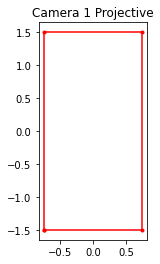

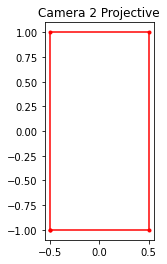

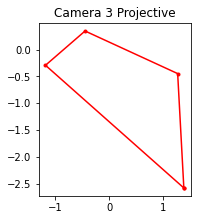

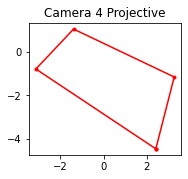

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


def to_homog(points): 
    # convert points from inhomogeneous to homogeneous
    # 
    # inputs: 
    # points is a dxn matrix where n is the number of d dimensional inhomogeneous points 
    # (e.g., d = 3 for 3D inhomogeneous points)
    #
    # outputs:
    # homo_points is a (d+1)xn matrix of n d-dimensional homogeneous points
    
    # write your code here

    ones = [1]*len(points[0])
    homo_points = np.append(points, [ones], axis=0)
    

    return homo_points


# point1 = np.array([[-3,-6,4]]).T
# point2 = np.array([[3,-6,4]]).T
# point3 = np.array([[3,6,4]]).T
# point4 = np.array([[-3,6,4]]).T
# points = np.hstack((point1,point2,point3,point4))
# print(to_homog(points))



def from_homog(points_homog):
    # convert points from homogeneous to inhomogeneous
    # inputs:
    # points_homog is a (d+1)xn matrix of n d-dimensional homogeous points (e.g., d = 2 
    # for 2D homogeneous points)
    #
    # outputs:
    # inhomo_points is a dxn matrix of n d-dimensional inhomogeous points 
    # write your code here
    output = np.zeros((len(points_homog) - 1 , len(points_homog[0])))
    constant = points_homog[len(points_homog) - 1]
    for i in range(len(points_homog)-1):
      for j in range(len(points_homog[0])):
        output[i][j] = points_homog[i][j]/constant[j]

    inhomog_points = output    

    return inhomog_points

# point1 = np.array([[-3,-6,4]]).T
# point2 = np.array([[3,-6,4]]).T
# point3 = np.array([[3,6,4]]).T
# point4 = np.array([[-3,6,4]]).T
# points = np.hstack((point1,point2,point3,point4))
# print(from_homog(points))


def project_points(P_int, P_ext, pts):
    # project 3D inhomogeneous points to 2D inhomogeneous points
    #
    # inputs:
    #    P_int - 3x3 intrinsic camera matrix
    #    P_ext - 3x4 extrinsic camera matrix
    #    pts - 3xn inhomogeneous points
    #
    # outputs:
    #    pts_2d - 2xn inhomogeneous points

    ptshomo = to_homog(pts)
    middle = np.matmul(P_int,P_ext)
    pts = np.matmul(middle,ptshomo)
    pts_2d = from_homog(pts)
    # print(pts_2d)

    
    # write your code here
      
    return pts_2d


# Change the three matrices for the four cases as described in the problem
# in the four camera functions given below. Make sure that we can see the formula
# (if one exists) being used to fill in the matrices. Feel free to document with
# comments any thing you feel the need to explain. 


def intrinsic_cam_mat(f):
    """
    K = [f 0 0
         0 f 0
         0 0 1] 
    """
    # given the focal length, compute the intrinsic camera matrix
    
    # write your code here
    K = np.identity(3)
    K[0][0] = f
    K[1][1] = f
    int_cam_mat = K

    return int_cam_mat

#test case
# print(intrinsic_cam_mat(3))

def extrinsic_cam_mat(angles, t, n):
    """
        ext_cam_mat = [R|t]
    """
    # Compute the extrinsic camera matrix
    #
    # inputs:
    #    angles - a tuple of angles (alpha, beta, gamma), representing the rotation
    #    angles around x-axis, y-axis, and z-axis repectively in degrees.
    #
    # outputs:
    #    ext_cam_mat - 3x4 extrinsic camera matrix
    # # write your code here

    # *math.pi/180 converts the degrees to radians
    Rz = [[math.cos(angles[2]*math.pi/180),-math.sin(angles[2]*math.pi/180) ,0] , [math.sin(angles[2]*math.pi/180) , math.cos(angles[2]*math.pi/180), 0], [0, 0, 1]]
    Ry = [[math.cos(angles[1]*math.pi/180),0,-math.sin(angles[1]*math.pi/180)] , [0, 1, 0], [-math.sin(angles[1]*math.pi/180) , 0 , math.cos(angles[1]*math.pi/180)]]
    Rx = [[1,0,0],[0,math.cos(angles[0]*math.pi/180),-math.sin(angles[0]*math.pi/180)] , [0,math.sin(angles[0]*math.pi/180) , math.cos(angles[0]*math.pi/180)]]
    
    
    # this is to seperate between the three multiplications depending on which rotation we are doing first and I will be using n = 5 for the camera functions  3-4 later on.
    if(n == 1): #RzRyRx
      R_mid = np.matmul(Ry,Rx)
      R = np.matmul(Rz,R_mid)
      R = np.hstack((R,np.array(t)))
    elif(n == 2): #RxRyRz
      R_mid = np.matmul(Ry,Rz)
      R = np.matmul(Rx,R_mid)
      R = np.hstack((R,np.array(t)))
    elif( n == 3): #RzRxRy
      R_mid = np.matmul(Rx,Ry)
      R = np.matmul(Rz,R_mid)
      R = np.hstack((R,np.array(t)))
    elif( n == 4): #RxRzRy
      R_mid = np.matmul(Rz,Ry)
      R = np.matmul(Rx,R_mid)
      R = np.hstack((R,np.array(t)))
    elif( n == 5): #RyRxRz
      R_mid = np.matmul(Rx,Rz)
      R = np.matmul(Ry,R_mid)
      R = np.hstack((R,np.array(t)))
    elif( n == 6): #RyRzRx
      R_mid = np.matmul(Rz,Rx)
      R = np.matmul(Ry,R_mid)
      R = np.hstack((R,np.array(t)))

    return R

def camera1():
    """
    replace with your code
    """
    # write your code here
    P_int_proj = intrinsic_cam_mat(1)
    t = [[0],[0],[0]]
    angles = (0,0,0)
    P_ext = extrinsic_cam_mat(angles,t,2)

    return P_int_proj, P_ext

def camera2():
    """
    replace with your code
    """
    P_int_proj = intrinsic_cam_mat(1)
    t = [[0],[0],[2]]
    angles = (0,0,0)
    P_ext = extrinsic_cam_mat(angles,t,1)
    # write your code here
    return P_int_proj, P_ext

def camera3():    
    
    P_int_proj = intrinsic_cam_mat(1)
    t = [[0],[0],[2]]
    angles = (30,0,60)
    P_ext = extrinsic_cam_mat(angles,t,5)
    """
    replace with your code
    """
    # write your code here

    return P_int_proj, P_ext

def camera4():
    """
    replace with your code
    """
    # write your code here
    P_int_proj = intrinsic_cam_mat(5)
    t = [[0],[0],[7]]
    angles = (30,0,60)
    P_ext = extrinsic_cam_mat(angles,t,5)
    return P_int_proj, P_ext


#######################################################
# test code. Do not modify
#######################################################

def plot_points(points, title='', style='.-r', axis=[]):
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    if title:
        plt.title(title)
    if axis:
        plt.axis('scaled')
        #plt.axis(axis)
        
def main():
    point1 = np.array([[-3,-6,4]]).T
    point2 = np.array([[3,-6,4]]).T
    point3 = np.array([[3,6,4]]).T
    point4 = np.array([[-3,6,4]]).T
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1, camera2, camera3, camera4]):
        P_int_proj, P_ext = camera()
        plt.subplot(1, 2, 1)
        plot_points(project_points(P_int_proj, P_ext, points), title='Camera %d Projective'%(i+1), axis=[-1,1,-1,1])
        plt.show()

main()

## Problem 3: Surface Rendering [18 pts]

In this portion of the assignment we will be exploring different methods of approximating local reflectance of
objects in a scene. This last section of the homework will be an exercise in rendering surfaces. Here, you need use the surface normals and the masks from the provided pickle files, with various light sources, different materials, and using a number of reflectance models. For the sake of simplicity, multiple reflections of light rays, and occlusion of light rays due to object/scene can be ignored.

### Data

The surface normals and masks are to be loaded from the respective pickle files. For comparison, You should display the rendering results for both normals calculated from the original image and the diffuse components. There are 2 images that we will be playing with namely one of a sphere and the other of a pear.

Masks serve the purpose as the binary_mask given to you last assignment0. Mask is a $H$x$W$ matrix with each element being either 1 or 0, indicating if a pixel at given location is sphere/pear or not. It is provided for you to remove the background of the rendered sphere/pear. 

Assume that the albedo map is uniform.

### Lambertian Reflectance

One of the simplest models available to render 3D objections with reflectance is the Lambertian model. This
model finds the apparent brightness to an observer using the direction of the light source $\hat{\mathbf{s}}$ and the normal
vector on the surface of the object $\hat{\mathbf{n}}$. The brightness intensity at a given point on an object’s surface, $\mathbf{e}$, with
a single light source is found using the following relationship:

$$\mathbf{e} = a\hspace{0.1cm}\text{max}(0, \hat{\mathbf{n}}^\top\mathbf{s})$$

$$\mathbf{s} = s_0 \hat{\mathbf{s}}\mathbf{C}$$

where, $a$ is the albedo of the surface facet imaged by pixel, $C$ is the light color, $s_0$ is the intensity of the light source and you can assume that the intensity is 1 here, and $\hat{\mathbf{s}}$ is the unit direction to the light source from the surface facet imaged by pixel.

### Blinn-Phong Reflectance

One major drawback of Lambertian reflectance is that it only considers the diffuse light in its calculation of
brightness intensity. One other major component to reflectance rendering is the specular component. The
specular reflectance is the component of light that is reflected in a single direction, as opposed to all directions,
which is the case in diffuse reflectance. One of the most used models to compute surface brightness with specular
components is the Blinn-Phong reflectance model. This model combines ambient lighting, diffused reflectance as well
as specular reflectance to find the brightness on a surface. Blinn-Phong shading also considers the material in the scene
which is characterized by four values: the ambient reflection constant ($k_a$), the diffuse reflection constant ($k_d$),
the specular reflection constant ($k_s$) and $\alpha$ the Blinn-Phong constant, which is the ‘shininess’ of an object. Furthermore,
since the specular component produces ‘rays’, only some of which would be observed by a single observer, the
observer’s viewing direction $\hat{\mathbf{v}}$ must also be known. For some scene with known material parameters with $M$
light sources the light intensity $\mathbf{e}$ on a surface with normal vector $\hat{\mathbf{n}}$ seen from viewing direction $\hat{\mathbf{v}}$ can be
computed by:

$$\mathbf{e} = \sum_{m\in M}\left\{ k_{a}\mathbf{s}_{m,a} + k_d\mathbf{s}_{m,d}\mathbf{f}_{d} + k_{s}\mathbf{s}_{m,s}\mathbf{f}_{s} \right\}\text{,}$$

$$\mathbf{f}_{d} = \text{max}(0, \hat{\mathbf{n}}^\top \hat{\mathbf{s}})\text{,}\hspace{0.5cm} \mathbf{f}_{s} = \text{max}(0, \hat{\mathbf{n}}^\top\mathbf{\hat{h}})^{\alpha}$$

$$\mathbf{\hat{h}} = \frac{\mathbf{h}}{||\mathbf{h}||}\text{,}\hspace{0.5cm} \mathbf{h}=\hat{\mathbf{s}}+\hat{\mathbf{v}}$$

where $\mathbf{s}_{m,a}$, is the ambient light intensity, $\mathbf{s}_{m,d}$ and $\mathbf{s}_{m,s}$ are the intensity of the the diffuse and
specular light respectively for the $m$th light source.

### Rendering

Please complete the following:

1. Write the function `lambertian()` that calculates the Lambertian light intensity given the light direction $\hat{\mathbf{s}}$ with intensity $s_0$, and normal vector $\hat{\mathbf{n}}$. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the two lighting sources found in Table 1. *Note: You do not need to worry about material coefficients in this model.*

1. Write the function `blinn_phong()` that calculates the Blinn-Phong light intensity given the material constants $(k_a, k_d, k_s, \alpha)$, $\hat{\mathbf{v}} = (0, 0, 1)^\top$, $\hat{\mathbf{n}}$ and some number of $M$ light sources. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the sets of coefficients found in Table 2 with each light source individually, and both light sources combined.


Table 1: Light Sources

| $m$ | Location | Color (RGB)  |
| - | ----------- | ----- |
| 1 | $(-\tfrac{1}{2},\tfrac{1}{2},\tfrac{1}{2})^{\top}$ | $(1,1,1)$ |
| 2 | $(1,0,0)^{\top}$     | $(1,.45,1)$ |

Table 2: Material Coefficients

| Mat. | $k_a$ | $k_d$ | $k_s$ | $\alpha$ |
| - | -------- | ----- | ----- | -------- |
| 1 | $0$ | $0.1$ | $0.5$ | $5$ |
| 2 | $0$ | $0.5$ | $0.1$ | $5$ |
| 3 | $0$ | $0.5$ | $0.5$ | $10$ |

### Part 1. Plot the normals [4 pts] (Sphere - 2pts, Pear - 2pts)
In this first part, you are required to work with 2 images, one of a sphere and the other one of a pear. The pickle file normals.pickle is a list consisting of 4 numpy matrices which are    
1) Normal Vectors for the sphere with specularities removed (Diffuse component)  
2) Normal Vector for the sphere    
3) Normal Vectors for the pear with specularities removed (Diffuse component)  
4) Normal vectors for the pear  

Please plot the normals using the function plot_normals which is provided.

In [ ]:
def plot_normals(diffuse_normals, original_normals):
    # Stride in the plot, you may want to adjust it to different images
    stride = 5
    
    normalss = diffuse_normals
    normalss1 = original_normals
    
    print("Normals:")
    print("Diffuse")
    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss[..., 2])
    plt.show()
    print("Original")
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss1[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss1[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss1[..., 2])
    plt.show()

Sphere
Normals:
Diffuse


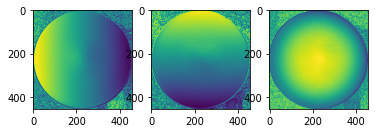

Original


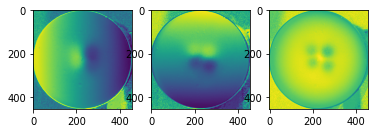

Pear
Normals:
Diffuse


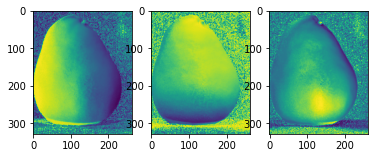

Original


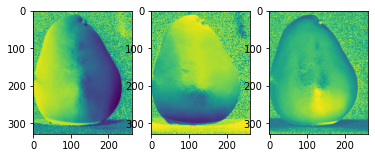

'  We can see that the original images have pimple-like shapes (bumps) on the facets that are reflecting light too much (as we saw in class), whereas in the diffuse components\nthese reflecting parts are ruled out hence we see a much smoother surface for our images without bumps. \n'

In [ ]:
#Plot the normals for the sphere and pear for both the normal and diffuse components.
#1 : Load the different normals
import pickle

with open('normals.pkl', 'rb') as f:
    data = pickle.load(f)

# print(data)
#2 : Plot the normals using plot_normals
print("Sphere")
plot_normals(data[0],data[1])
print("Pear")
plot_normals(data[2],data[3])


#What do you observe? What are the differences between the diffuse component and the original images shown?
'''  We can see that the original images have pimple-like shapes (bumps) on the facets that are reflecting light too much (as we saw in class), whereas in the diffuse components
these reflecting parts are ruled out hence we see a much smoother surface for our images without bumps. 
'''

#PLOT HERE

### Part 2. Lambertian model [6 pts]

Fill in your implementation for the rendered image using the lambertian model.

In [ ]:
def normalize(img):
    assert img.shape[2] == 3
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

In [ ]:
from numpy import linalg
def lambertian(normals, lights, color, intensity, mask):
    image = np.zeros((normals.shape[0], normals.shape[1], 3))
    for i in range(normals.shape[0]):
      for j in range(normals.shape[1]):
        normal = normals[i,j]
        normal = normal.T
        norm_lights = linalg.norm(lights)
        lights /= norm_lights
        norm_norm = linalg.norm(normal)
        normal /= norm_norm
        n = max(0,np.dot(normal,lights.T))*color
        image[i][j] = np.dot(mask[i][j],n)

    return (image)


Plot the rendered results for both the sphere and the pear for both the original and the diffuse components. Remember to first load the masks from the masks.pkl file. The masks.pkl file is a list consisting of 2 numpy arrays-  
1)Mask for the sphere  
2)Mask for the pear  

Plot the normalized image using the function normalize which is provided.

With 2 light directions and 2 light colors, we expect 4 images for Pear and 4 images for Sphere. 

In [ ]:
# Load the masks for the sphere and pear
with open('masks.pkl', 'rb') as h:
    data1 = pickle.load(h)

# Output the rendering results for Pear
# Read light direction and color from the table
dirn1 = np.zeros([3,1])
color1 = np.zeros([1,3])
dirn2 = np.zeros([3,1])
color2 = np.zeros([1,3])

#Display the rendering results for pear for both diffuse and for both the light sources

In [ ]:
# Output the rendering results for Sphere
dirn1 = np.array([[-.5,.5,.5]])
dirn2 = np.array([[1., 0, 0]])
color1 = np.array([[1., 1., 1.]])
color2 = np.array([[1,.45,1]])
# sphere = lambertian(data[0],dirn1,color1,1,data1[0]) #
# sphere = normalize(sphere)
# plt.imshow(sphere)
# plt.show()
SD1 = normalize(lambertian(data[0],dirn1,color1,1,data1[0]))
SD2 = normalize(lambertian(data[0],dirn2,color2,1,data1[0]))
SS1 = normalize(lambertian(data[1],dirn1,color1,1,data1[0]))
SS2 = normalize(lambertian(data[1],dirn2,color2,1,data1[0]))
# PEAR
PD1 = normalize(lambertian(data[2],dirn1,color1,1,data1[1]))
PD2 = normalize(lambertian(data[2],dirn2,color2,1,data1[1]))
PS1 = normalize(lambertian(data[3],dirn1,color1,1,data1[1]))
PS2 = normalize(lambertian(data[3],dirn2,color2,1,data1[1]))
print("Sphere Diffuse light 1")
plt.imshow(SD1)
plt.show()
print("Sphere Diffuse light 2")
plt.imshow(SD2)
plt.show()
print("Sphere Spectral light 1")
plt.imshow(SS1)
plt.show()
print("Sphere Spectral light 2")
plt.imshow(SS2)
plt.show()
print("Pear Diffuse light 1")
plt.imshow(PD1)
plt.show()
print("Pear Diffuse light 2")
plt.imshow(PD2)
plt.show()
print("Pear Spectral light 1")
plt.imshow(PS1)
plt.show()
print("Pear Spectral light 2")
plt.imshow(PS2)
plt.show()
#Display the rendering results for sphere for both diffuse and for both the light sources

### Part 3. Blinn-Phong model [8 pts]

Please fill in your implementation for the Blinn-Phong model below.

In [ ]:
def blinn_phong(normals, lights, color, material, view, mask):
    image = np.zeros((normals.shape[0], normals.shape[1], 3))
    for i in range(normals.shape[0]):
      for j in range(normals.shape[1]):
        kd = material[0]
        ks = material[1]
        a = material[2]
        normal = normals[i,j]
        normal = normal.T
        msk = mask[i,j]
        norm_lights = linalg.norm(lights)
        lights /= norm_lights
        norm_view = linalg.norm(view)
        view = view/norm_view
        f = max(0,np.matmul(normal,lights.T))
        second = np.dot(kd,f)
        h = lights+view
        h /= linalg.norm(h)
        fs = pow(max(0,np.matmul(normal,h.T)),a)
        third = ks*fs
        total = (second+third)*msk
        total = total*color
        image[i][j] = total
    return (image)

With the function completed, plot the rendering results for the sphere and pear (both diffuse and original components) for all the materials and light sources and also with the combination of both the light sources.

With 2 light sources and 3 materials, we expect 9 images each for diffuse and original components. In total, 3\*3\*2 = 18 images for sphere and 18 images for pear. 

In [ ]:
# Output the rendering results for sphere
view =  np.array([[0],[0],[1]])
view = view.reshape(1,3)
material = np.array([[0.1,0.5,5],[0.5,0.1,5],[0.5,0.5,10]])
lightcol1 =  np.array([[-1.0/2,1],[1.0/2,1],[1.0/2,1]])
lightcol2 = np.array([[1,1],[0,0.45],[0,1]])
light1 = lightcol1[:,0]
# print(light1)
light2 = lightcol2[:,0]
col1 = lightcol1[:,1]
# print(light1)
col2 = lightcol2[:,1]

SDL1M1 = blinn_phong(data[0],light1,col1,material[0],view,data1[0])
SDL1M2 = blinn_phong(data[0],light1,col1,material[1],view,data1[0])
SDL1M3 = blinn_phong(data[0],light1,col1,material[2],view,data1[0])
SDL2M1 = blinn_phong(data[0],light2,col2,material[0],view,data1[0])
SDL2M2 = blinn_phong(data[0],light2,col2,material[1],view,data1[0])
SDL2M3 = blinn_phong(data[0],light2,col2,material[2],view,data1[0])
SDL1L2M1 = np.zeros((data[0].shape[0], data[0].shape[1], 3))
SDL1L2M1[:,:] = SDL1M1[:,:] + SDL2M1[:,:]
SDL1L2M2 = np.zeros((data[0].shape[0], data[0].shape[1], 3))
SDL1L2M2[:,:] = SDL1M2[:,:] + SDL2M2[:,:]
SDL1L2M3 = np.zeros((data[0].shape[0], data[0].shape[1], 3))
SDL1L2M3[:,:] = SDL1M3[:,:] + SDL2M3[:,:]

SSL1M1 = blinn_phong(data[1],light1,col1,material[0],view,data1[0])
SSL1M2 = blinn_phong(data[1],light1,col1,material[1],view,data1[0])
SSL1M3 = blinn_phong(data[1],light1,col1,material[2],view,data1[0])
SSL2M1 = blinn_phong(data[1],light2,col2,material[0],view,data1[0])
SSL2M2 = blinn_phong(data[1],light2,col2,material[1],view,data1[0])
SSL2M3 = blinn_phong(data[1],light2,col2,material[2],view,data1[0])
SSL1L2M1 = np.zeros((data[1].shape[0], data[0].shape[1], 3))
SSL1L2M1[:,:] = SSL1M1[:,:] + SSL2M1[:,:]
SSL1L2M2 = np.zeros((data[1].shape[0], data[0].shape[1], 3))
SSL1L2M2[:,:] = SSL1M2[:,:] + SSL2M2[:,:]
SSL1L2M3 = np.zeros((data[1].shape[0], data[0].shape[1], 3))
SSL1L2M3[:,:] = SSL1M3[:,:] + SSL2M3[:,:]
#Display rendered results for sphere for all materials and light sources and combination of light sources






Diffuse


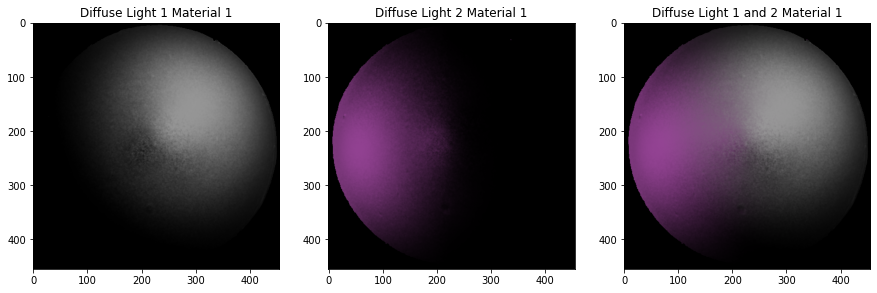

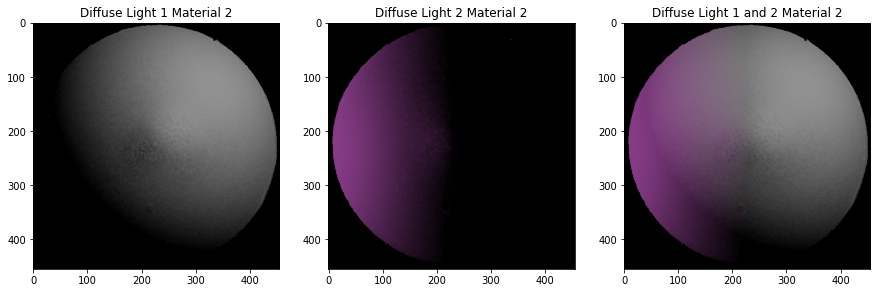

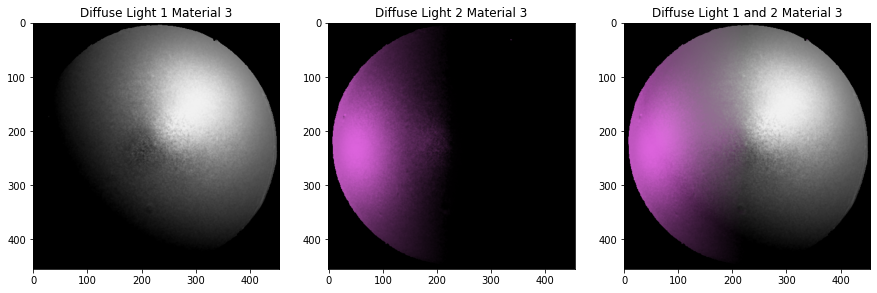

Spectral


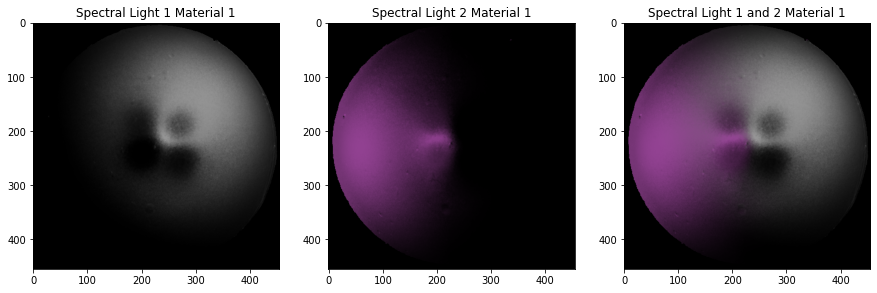

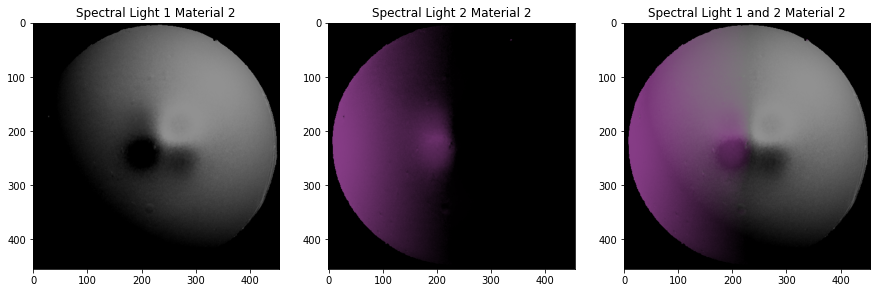

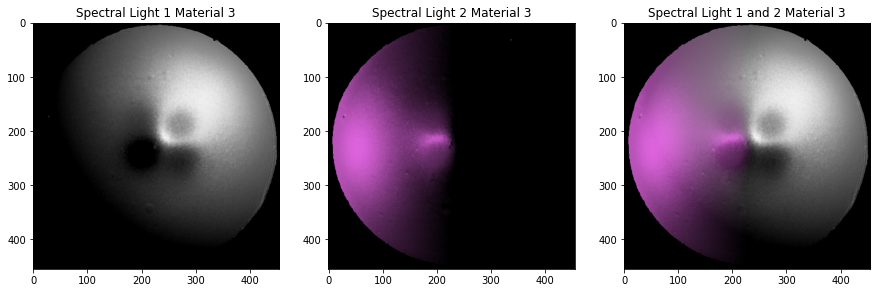

In [ ]:
print("Diffuse")
# showing normals as three separate channels
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Diffuse Light 1 Material 1")
ax1.imshow(SDL1M1)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Diffuse Light 2 Material 1")
ax1.imshow(SDL2M1)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffuse Light 1 and 2 Material 1")   
ax1.imshow(SDL1L2M1)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Diffuse Light 1 Material 2")
ax1.imshow(SDL1M2)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Diffuse Light 2 Material 2")
ax1.imshow(SDL2M2)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffuse Light 1 and 2 Material 2")   
ax1.imshow(SDL1L2M2)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Diffuse Light 1 Material 3")
ax1.imshow(SDL1M3)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Diffuse Light 2 Material 3")
ax1.imshow(SDL2M3)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffuse Light 1 and 2 Material 3")   
ax1.imshow(SDL1L2M3)
plt.show()
print("Spectral")
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Spectral Light 1 Material 1")
ax1.imshow(SSL1M1)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Spectral Light 2 Material 1")
ax1.imshow(SSL2M1)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Spectral Light 1 and 2 Material 1")   
ax1.imshow(SSL1L2M1)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Spectral Light 1 Material 2")
ax1.imshow(SSL1M2)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Spectral Light 2 Material 2")
ax1.imshow(SSL2M2)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Spectral Light 1 and 2 Material 2")   
ax1.imshow(SSL1L2M2)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Spectral Light 1 Material 3")
ax1.imshow(SSL1M3)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Spectral Light 2 Material 3")
ax1.imshow(SSL2M3)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Spectral Light 1 and 2 Material 3")   
ax1.imshow(SSL1L2M3)
plt.show()

In [ ]:
# Output the rendering results for the pear.
view =  np.array([[0],[0],[1]])
view = view.reshape(1,3)
material = np.array([[0.1,0.5,5],[0.5,0.1,5],[0.5,0.5,10]])
lightcol1 =  np.array([[-1.0/2,1],[1.0/2,1],[1.0/2,1]])
lightcol2 = np.array([[1,1],[0,0.45],[0,1]])
light1 = lightcol1[:,0]
light2 = lightcol2[:,0]
col1 = lightcol1[:,1]
col2 = lightcol2[:,1]
#Display rendered results for pear for all materials and light sources and combination of light sources
PDL1M1 = blinn_phong(data[2],light1,col1,material[0],view,data1[1])
PDL1M2 = blinn_phong(data[2],light1,col1,material[1],view,data1[1])
PDL1M3 = blinn_phong(data[2],light1,col1,material[2],view,data1[1])
PDL2M1 = blinn_phong(data[2],light2,col2,material[0],view,data1[1])
PDL2M2 = blinn_phong(data[2],light2,col2,material[1],view,data1[1])
PDL2M3 = blinn_phong(data[2],light2,col2,material[2],view,data1[1])
PDL1L2M1 = np.zeros((data[2].shape[0], data[2].shape[1], 3))
PDL1L2M1[:,:] = PDL1M1[:,:] + PDL2M1[:,:]
PDL1L2M2 = np.zeros((data[2].shape[0], data[2].shape[1], 3))
PDL1L2M2[:,:] = PDL1M2[:,:] + PDL2M2[:,:]
PDL1L2M3 = np.zeros((data[2].shape[0], data[2].shape[1], 3))
PDL1L2M3[:,:] = PDL1M3[:,:] + PDL2M3[:,:]

PSL1M1 = blinn_phong(data[3],light1,col1,material[0],view,data1[1])
PSL1M2 = blinn_phong(data[3],light1,col1,material[1],view,data1[1])
PSL1M3 = blinn_phong(data[3],light1,col1,material[2],view,data1[1])
PSL2M1 = blinn_phong(data[3],light2,col2,material[0],view,data1[1])
PSL2M2 = blinn_phong(data[3],light2,col2,material[1],view,data1[1])
PSL2M3 = blinn_phong(data[3],light2,col2,material[2],view,data1[1])
PSL1L2M1 = np.zeros((data[3].shape[0], data[3].shape[1], 3))
PSL1L2M1[:,:] = PSL1M1[:,:] + PSL2M1[:,:]
PSL1L2M2 = np.zeros((data[3].shape[0], data[3].shape[1], 3))
PSL1L2M2[:,:] = PSL1M2[:,:] + PSL2M2[:,:]
PSL1L2M3 = np.zeros((data[3].shape[0], data[3].shape[1], 3))
PSL1L2M3[:,:] = PSL1M3[:,:] + PSL2M3[:,:]

Diffuse


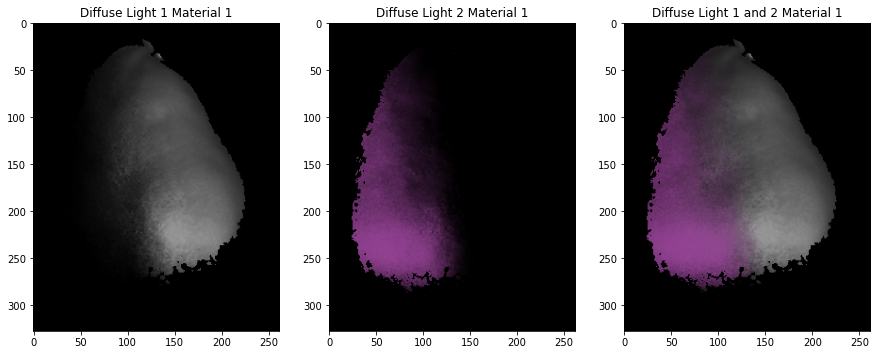

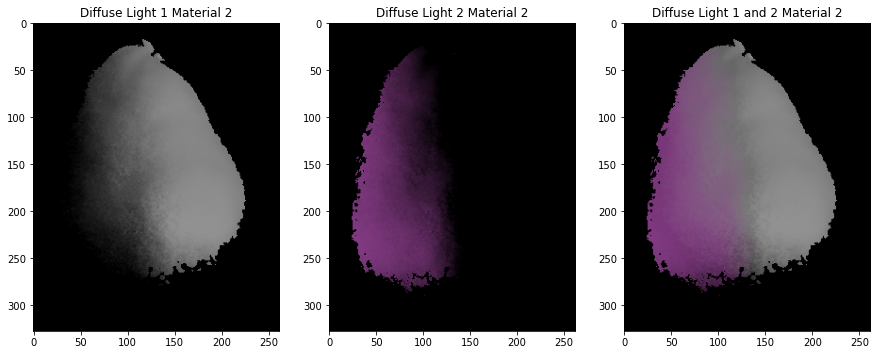

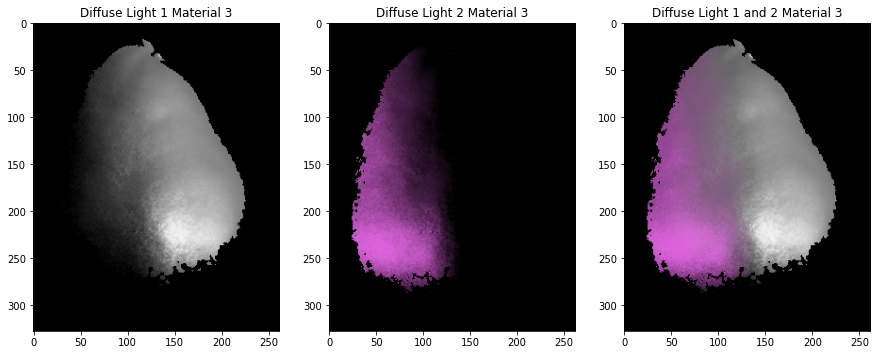

Spectral


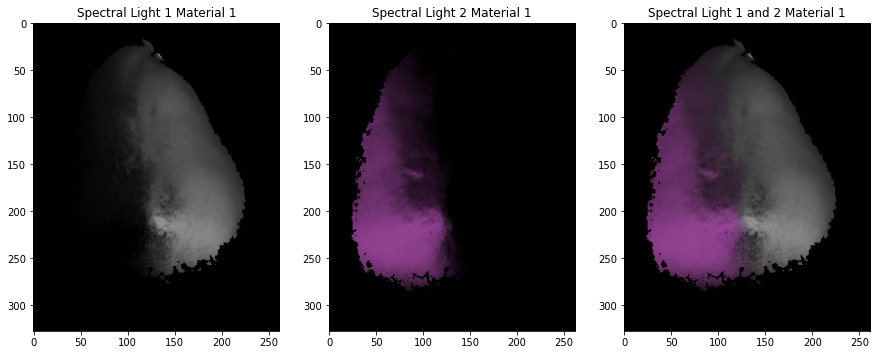

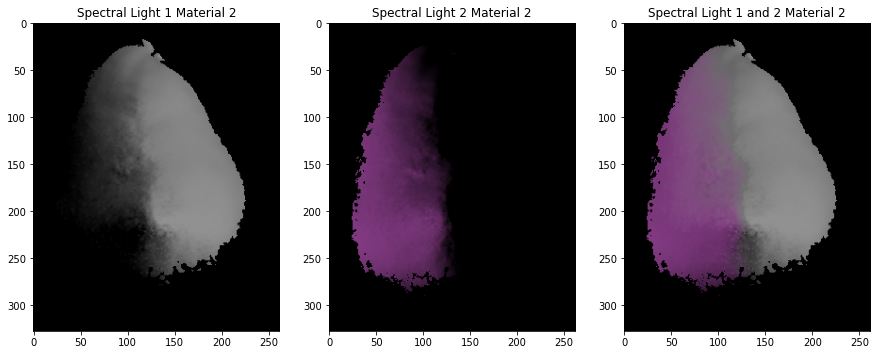

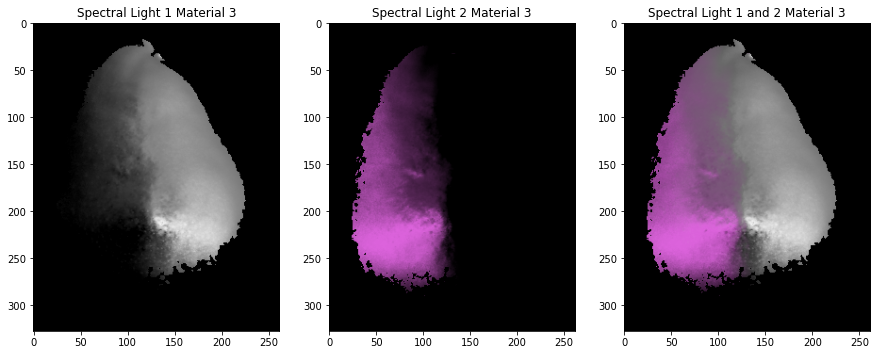

In [ ]:
print("Diffuse")
# showing normals as three separate channels
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Diffuse Light 1 Material 1")
ax1.imshow(PDL1M1)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Diffuse Light 2 Material 1")
ax1.imshow(PDL2M1)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffuse Light 1 and 2 Material 1")   
ax1.imshow(PDL1L2M1)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Diffuse Light 1 Material 2")
ax1.imshow(PDL1M2)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Diffuse Light 2 Material 2")
ax1.imshow(PDL2M2)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffuse Light 1 and 2 Material 2")   
ax1.imshow(PDL1L2M2)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Diffuse Light 1 Material 3")
ax1.imshow(PDL1M3)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Diffuse Light 2 Material 3")
ax1.imshow(PDL2M3)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffuse Light 1 and 2 Material 3")   
ax1.imshow(PDL1L2M3)
plt.show()
print("Spectral")
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Spectral Light 1 Material 1")
ax1.imshow(PSL1M1)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Spectral Light 2 Material 1")
ax1.imshow(PSL2M1)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Spectral Light 1 and 2 Material 1")   
ax1.imshow(PSL1L2M1)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Spectral Light 1 Material 2")
ax1.imshow(PSL1M2)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Spectral Light 2 Material 2")
ax1.imshow(PSL2M2)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Spectral Light 1 and 2 Material 2")   
ax1.imshow(PSL1L2M2)
plt.show()
figure = plt.figure()
figure.set_figheight(15)
figure.set_figwidth(15)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Spectral Light 1 Material 3")
ax1.imshow(PSL1M3)
ax1 = figure.add_subplot(132)
ax1.title.set_text("Spectral Light 2 Material 3")
ax1.imshow(PSL2M3)
ax1 = figure.add_subplot(133)
ax1.title.set_text("Spectral Light 1 and 2 Material 3")   
ax1.imshow(PSL1L2M3)
plt.show()

## Problem 4: Photometric Stereo, Specularity Removal (20 pts)

The goal of this problem is to implement a couple of different algorithms that reconstruct a surface using the concept of Lambertian photometric stereo. Additionally, you will implement the specular removal technique of [Mallick et al.](http://www.eecs.harvard.edu/~zickler/download/photodiff_cvpr05_preprint.pdf), which enables photometric stereo to be performed on certain non-Lambertian materials.

You can assume a Lambertian reflectance function once specularities are removed. However, note that the albedo is unknown and non-constant in the images you will use.

As input, your program should take in multiple images along with the light source direction for each image. Each image is associated with only a single light, and hence a single direction.

### Data
You will use synthetic images and specular sphere images as data. These images are stored in `.pickle` files which have been graciously provided by Satya Mallick. Each `.pickle` file contains

* `im1`, `im2`, `im3`, `im4`, ... images.
* `l1`, `l2`, `l3`, `l4`, ... light source directions.

### Part 1: Lambertian Photometric Stereo [8 pts]

Implement the photometric stereo technique described in the lecture. Your program should have two parts:

1. Read in the images and corresponding light source directions, and estimate the surface normals and albedo map.

1. Reconstruct the depth map from the surface normals. You should first try the naive scanline-based "shape by integration" method described in lecture. (You are required to implement this.) For comparison, you should also integrate using the Horn technique which is already implemented for you in the `horn_integrate` function. Note that for good results you will often want to run the `horn_integrate` function with 10000-100000 iterations, which will take a while. For your final submission, we will require that you run Horn integration for 1000 (one thousand) iterations or more in each case. But for debugging, it is suggested that you keep the number of iterations low.

You will find all the data for this part in `synthetic_data.pickle`. Try using only `im1`, `im2` and `im4` first. Display your outputs as mentioned below.

Then use all four images (most accurate).

For **each** of the **two above cases** you must output:

1. The estimated albedo map.

1. The estimated surface normals by showing both
    1. Needle map, and
    1. Three images showing each of the surface normal components.

1. A wireframe of the depth map given by the scanline method.

1. A wireframe of the depth map given by Horn integration.

In total, we expect 2 * 7 = 14 images for this part.

An example of outputs is shown in the figure below. (The example outputs only include one depth map, although we expect two – see above.)

![Problem 4.1 example outputs](problem4_example.png)

Keys:  ['__version__', 'l4', '__header__', 'im1', 'im3', 'im2', 'l2', 'im4', 'l1', '__globals__', 'l3']

Image 1:


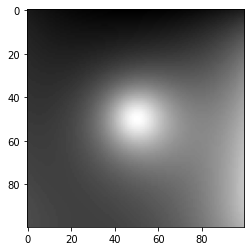

Light source direction: [[0 0 1]]

Image 2:


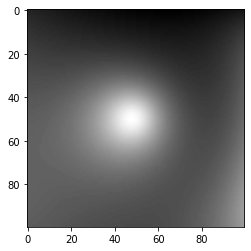

Light source direction: [[0.2 0.  1. ]]

Image 3:


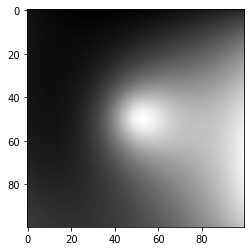

Light source direction: [[-0.2  0.   1. ]]

Image 4:


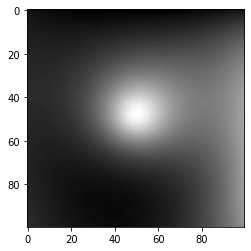

Light source direction: [[0.  0.2 1. ]]


In [ ]:
# Setup
import pickle
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

### Example: how to read and access data from a .pickle file
pickle_in = open("synthetic_data.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# data is a dict which stores each element as a key-value pair. 
print("Keys: ", list(data.keys()))

# To access the value of an entity, refer to it by its key.
for i in range(1, 5):
    print("\nImage %d:" % i)
    plt.imshow(data["im%d" % i], cmap="gray")
    plt.show()
    print("Light source direction: " + str(data["l%d" % i]))

Based on the above images, can you interpret the orientation of the coordinate frame? If we label the axes in order as x, y, z, then the x-axis points left, the y-axis points up, and the z-axis points out of the screen in our direction. (That means this is a left-handed coordinate system. How will this affect the scanline integration algorithm? Hint: if you integrate rightward along the x-axis and downward along the y-axis, you will be doing in opposite directions to the axes, and the partial derivatives you compute may need to be modified.)

_Note: as clarification, no direct response is needed for this cell._

In [ ]:
import numpy as np
from scipy.signal import convolve

def horn_integrate(gx, gy, mask, niter):
    """
    horn_integrate recovers the function g from its partial 
    derivatives gx and gy. 
    mask is a binary image which tells which pixels are 
    involved in integration. 
    niter is the number of iterations. 
    typically 100,000 or 200,000, 
    although the trend can be seen even after 1000 iterations.
    """
    g = np.ones(np.shape(gx))
    
    gx = np.multiply(gx, mask)
    gy = np.multiply(gy, mask)
    
    A = np.array([[0,1,0],[0,0,0],[0,0,0]]) #y-1
    B = np.array([[0,0,0],[1,0,0],[0,0,0]]) #x-1
    C = np.array([[0,0,0],[0,0,1],[0,0,0]]) #x+1
    D = np.array([[0,0,0],[0,0,0],[0,1,0]]) #y+1
    
    d_mask = A + B + C + D
    
    den = np.multiply(convolve(mask,d_mask,mode="same"),mask)
    den[den == 0] = 1
    rden = 1.0 / den
    mask2 = np.multiply(rden, mask)
    
    m_a = convolve(mask, A, mode="same")
    m_b = convolve(mask, B, mode="same")
    m_c = convolve(mask, C, mode="same")
    m_d = convolve(mask, D, mode="same")
    
    term_right = np.multiply(m_c, gx) + np.multiply(m_d, gy)
    t_a = -1.0 * convolve(gx, B, mode="same")
    t_b = -1.0 * convolve(gy, A, mode="same")
    term_right = term_right + t_a + t_b
    term_right = np.multiply(mask2, term_right)
    
    for k in range(niter):
        g = np.multiply(mask2, convolve(g, d_mask, mode="same")) + term_right
    
    return g

In [ ]:
def photometric_stereo(images, lights, mask, horn_niter=25000):
    
    """mask is an optional parameter which you are encouraged to use.
    It can be used e.g. to ignore the background when integrating the normals.
    It should be created by converting the images to grayscale, averaging them,
    normalizing to [0, 1] and thresholding (only using locations for which the
    pixel value is above some threshold).
    
    The choice of threshold is something you can experiment with,
    but in practice something like 0.05 or 0.1 tends to work well.
    
    You do not need to use the mask for 1a (it shouldn't matter),
    but you SHOULD use it to filter out the background for the specular data (1c).
    """

    """ ==========
    YOUR CODE HERE
    ========== """

    # note:
    # images : (n_ims, h, w)
    # lights : (n_ims, 3)
    # mask   : (h, w)
    
    albedo = np.zeros(images[0].shape)
    normals = np.dstack((np.zeros(images[0].shape),
                         np.zeros(images[0].shape),
                         np.ones(images[0].shape)))
    H = np.ones(images[0].shape)
    Splus = np.dot(np.linalg.inv(np.dot(np.transpose(lights),lights)),np.transpose(lights))
    # print(Splus)
    b = np.ones((len(images[0]),len(images[0][0]),3))
    for i in range(len(images[0])):
      for j in range(len(images[0][0])):
        exy = []
        for elem in range(images.shape[0]):
          exy.append(images[elem][i][j])
        exy = np.array(exy)
        b[i][j] = (np.dot(Splus,exy.T)).T

    for i in range(len(normals)):
      for j in range(len(normals[0])):
        # print(mask[i][j])
        if mask[i][j] == 0:
          continue
        else:
          norm_b = linalg.norm(b[i][j])
          b[i][j] = b[i][j]/norm_b
          # print(b[i][j])
          albedo[i][j] = norm_b
          normals[i][j] = b[i][j]
          # print(albedo[i][j])
          # print(normals[i][j])

    H = np.ones(images[0].shape)
    gx = np.ones(images[0].shape)
    gy = np.ones(images[0].shape)
    total = 0
    minimum = 10000


    for i in range(len(albedo)):
        if mask[i][0] == 0:
          continue
        else:
          nx = normals[i][0][0]
          ny = normals[i][0][1]
          nz = normals[i][0][2]
          q = ny/nz
          total += q
          H[i][0] = total
          if(H[i][0] < minimum):
            minimum = H[i][0]
          p = nx/nz
          gx[i][0] = p
          gy[i][0] = q
    # print(H[0][0])

    for i in range(len(albedo)):
      total = H[i][0]
      for j in range(1,len(albedo[0])):
        if mask[i][j] == 0:
          continue
        else:
          nx = normals[i][j][0]
          ny = normals[i][j][1]
          nz = normals[i][j][2]
          p = nx/nz
          total = total + p 
          H[i][j] = total
          if(H[i][j] < minimum):
            minimum = H[i][j]
          q = ny/nz
          gx[i][j] = p
          gy[i][j] = q


    for i in range(len(albedo)):
      for j in range(len(albedo[0])):
        if(mask[i][j] != 0):
          H[i][j] -= minimum

    H_horn = horn_integrate(gx,gy,mask,horn_niter)

    return albedo, normals, H, H_horn

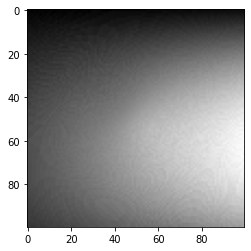

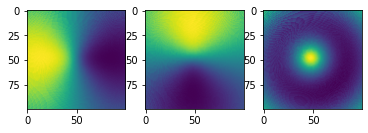

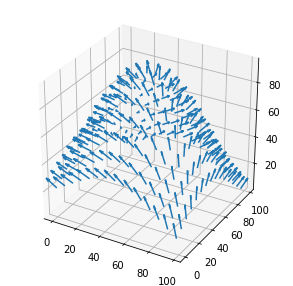

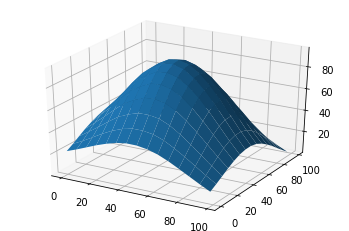

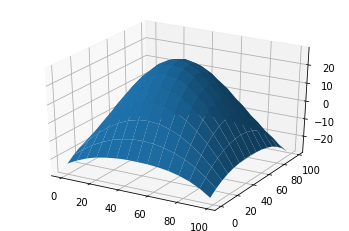

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pickle_in = open("synthetic_data.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

lights = np.vstack((data["l1"], data["l2"], data["l4"]))
# lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
images.append(data["im1"])
images.append(data["im2"])
# images.append(data["im3"])
images.append(data["im4"])
images = np.array(images)

mask = np.ones(data["im1"].shape)

albedo, normals, depth, horn = photometric_stereo(images, lights, mask, 1000)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):
    # Stride in the plot, you may want to adjust it to different images
    stride = 7

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.imshow(albedo, cmap="gray")
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], 7),
                          np.arange(0,np.shape(normals)[1], 7),
                          np.arange(1))
    # print(X)
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=10)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

    H = horn[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

visualize(albedo, normals, depth, horn)

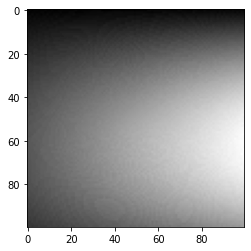

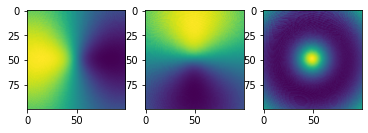

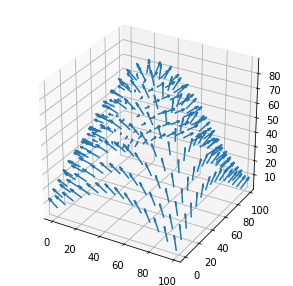

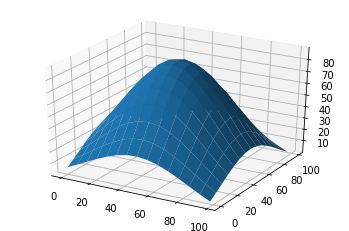

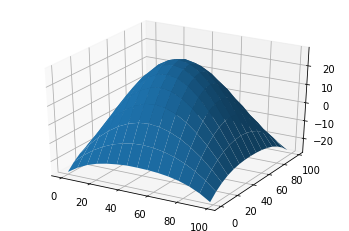

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pickle_in = open("synthetic_data.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# lights = np.vstack((data["l1"], data["l2"], data["l4"]))
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
images.append(data["im1"])
images.append(data["im2"])
images.append(data["im3"])
images.append(data["im4"])
images = np.array(images)

mask = np.ones(data["im1"].shape)

albedo, normals, depth, horn = photometric_stereo(images, lights, mask, 1000)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):
    # Stride in the plot, you may want to adjust it to different images
    stride = 7

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.imshow(albedo, cmap="gray")
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], 7),
                          np.arange(0,np.shape(normals)[1], 7),
                          np.arange(1))
    # print(X)
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=10)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

    H = horn[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

visualize(albedo, normals, depth, horn)

### Part 2: Specularity Removal [6 pts]

Implement the specularity removal technique described in *Beyond Lambert: Reconstructing Specular Surfaces Using Color* (by Mallick, Zickler, Kriegman, and Belhumeur; CVPR 2005).

Your program should input an RGB image and light source color and output the corresponding SUV image.  

Try this out first with the specular sphere images and then with the pear images.  
  
For each of the specular sphere and pear images, include

1. The original image (in RGB colorspace).

1. The recovered $S$ channel of the image.

1. The recovered diffuse part of the image. Use $D = \sqrt{U^2+V^2}$ to represent the diffuse part.

In total, we expect 2 * 3 = 6 images as outputs for this problem.

Note: You will find all the data for this part in `specular_sphere.pickle` and `specular_pear.pickle`.

Spheres


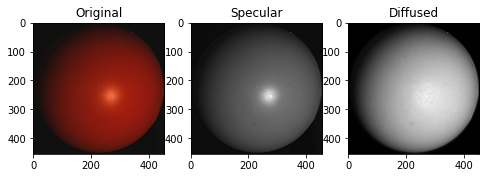

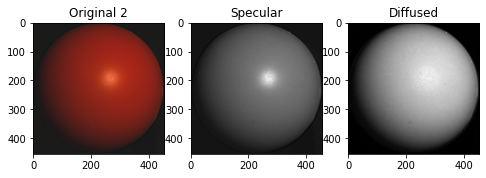

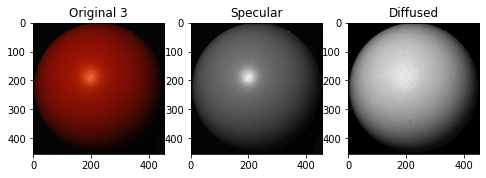

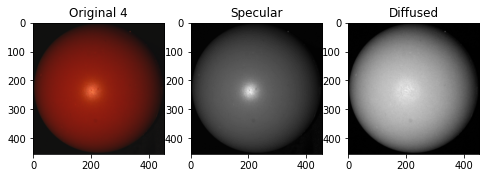

In [ ]:
def get_rot_mat(rot_v, unit=None):
    '''
    Takes a vector and returns the rotation matrix required to align the
    unit vector(2nd arg) to it.
    '''
    if unit is None:
        unit = [1.0, 0.0, 0.0]
    
    rot_v = rot_v/np.linalg.norm(rot_v)
    uvw = np.cross(rot_v, unit) # axis of rotation

    rcos = np.dot(rot_v, unit) # cos by dot product
    rsin = np.linalg.norm(uvw) # sin by magnitude of cross product

    # normalize and unpack axis
    if not np.isclose(rsin, 0):
        uvw = uvw/rsin
    u, v, w = uvw

    # compute rotation matrix 
    R = (
        rcos * np.eye(3) +
        rsin * np.array([
            [ 0, -w,  v],
            [ w,  0, -u],
            [-v,  u,  0]
        ]) +
        (1.0 - rcos) * uvw[:,None] * uvw[None,:]
    )
    return R

def RGBToSUV(I_rgb, rot_vec):
    '''
    Your implementation which takes an RGB image and a vector encoding
    the orientation of the S channel w.r.t. to RGB.
    '''

    """ ==========
    YOUR CODE HERE
    ========== """
    S = np.ones(I_rgb.shape[:2])
    G = np.ones(I_rgb.shape[:2])
    matrix = get_rot_mat(rot_vec)
    for i in range(I_rgb.shape[0]):
      for j in range(I_rgb.shape[1]):
        rgbT = np.transpose(I_rgb[i,j])
        SUV = np.matmul(matrix,rgbT)
        S[i][j] = SUV[0]
        G[i][j] = np.linalg.norm(SUV[1:3])

    return S, G

pickle_in = open("specular_sphere.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# sample input
S, G = RGBToSUV(data["im1"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))
print("Spheres")
figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original")
ax1.imshow(normalize(data["im1"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


S, G = RGBToSUV(data["im2"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))

figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original 2")
ax1.imshow(normalize(data["im2"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


S, G = RGBToSUV(data["im3"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))

figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original 3")
ax1.imshow(normalize(data["im3"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


S, G = RGBToSUV(data["im4"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))
figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original 4")
ax1.imshow(normalize(data["im4"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


Pears


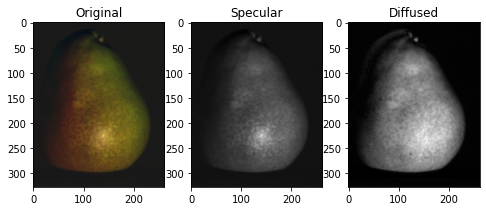

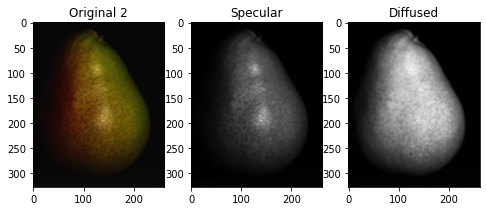

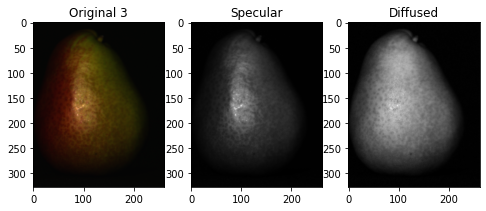

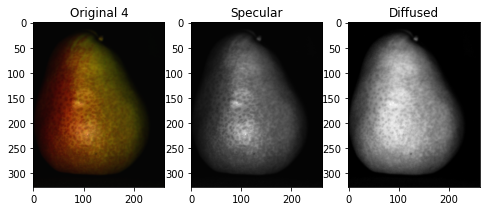

In [ ]:
pickle_in = open("specular_pear.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# sample input
S, G = RGBToSUV(data["im1"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))
print("Pears")
figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original")
ax1.imshow(normalize(data["im1"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


S, G = RGBToSUV(data["im2"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))

figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original 2")
ax1.imshow(normalize(data["im2"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


S, G = RGBToSUV(data["im3"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))

figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original 3")
ax1.imshow(normalize(data["im3"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


S, G = RGBToSUV(data["im4"], np.hstack((data["c"][0][0],
                                        data["c"][1][0],
                                        data["c"][2][0])))
figure = plt.figure()
figure.set_figheight(8)
figure.set_figwidth(8)
ax1 = figure.add_subplot(131)
ax1.title.set_text("Original 4")
ax1.imshow(normalize(data["im4"]))
ax1 = figure.add_subplot(132)
ax1.title.set_text("Specular")
ax1.imshow(S, cmap = "gray")
ax1 = figure.add_subplot(133)
ax1.title.set_text("Diffused")
ax1.imshow(G, cmap = "gray")
plt.show()


### Part 3: Robust Photometric Stereo [6 pts]

Now we will perform photometric stereo on our sphere/pear images which include specularities. First, for comparison, run your photometric stereo code from 1a on the original images (converted to grayscale and rescaled/shifted to be in the range [0, 1]). You should notice erroneous "bumps" in the resulting reconstructions, as a result of violating the Lambertian assumption. For this, show the same outputs as in 1a.

Next, combine parts 1 and 2 by removing the specularities (using your code from 1b) and then running photometric stereo on the diffuse components of the specular sphere/pear images. Our goal will be to remove the bumps/sharp parts in the reconstruction.

For the specular sphere image set in `specular_sphere.pickle`, using all of the four images (again, be sure to convert them to grayscale and normalize them so that their values go from 0 to 1), include:

1. The estimated albedo map (original and diffuse).

1. The estimated surface normals (original and diffuse) by showing both

    1. Needle map, and
    1. Three images showing each of the surface normal components.
    
1. A wireframe of depth map (original and diffuse).

1. A wireframe of the depth map given by Horn integration (original and diffuse).

In total, we expect 2 \* 7 = 14 images for the 1a comparison, plus 2 \* 7 = 14 images for the outputs after specularity removal has been performed. (Thus 28 output images overall.)

In [ ]:
def normalize2(img):
    # assert img.shape[2] == 3
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

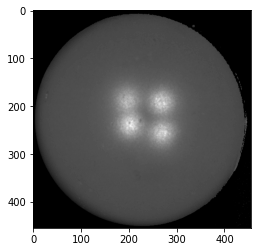

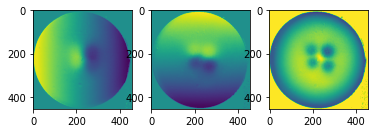

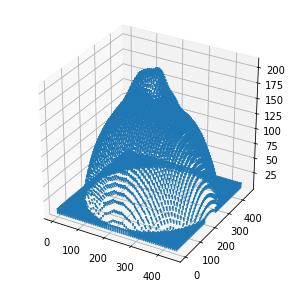

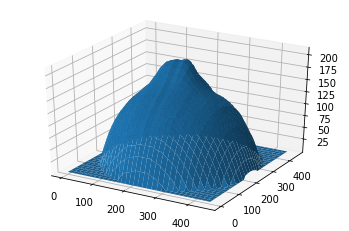

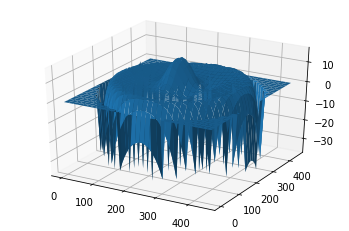

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pickle_in = open("specular_sphere.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# lights = np.vstack((data["l1"], data["l2"], data["l4"]))
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
for i in range(1,5):
  images.append((np.dot(np.array(data["im"+str(i)])[:,:,],[0.299,0.587,0.114])))

images = np.array(images)

mask = np.ones((data["im1"].shape[0],data["im1"].shape[1]))
matrix = np.dot(np.array(data["im4"])[:,:,],[0.299,0.587,0.114])
grey_albedo = normalize2(matrix)

for i in range(len(grey_albedo)):
  for j in range(len(grey_albedo[0])):
    if grey_albedo[i][j] <= 0.05:
      mask[i][j] = 0 



albedo, normals, depth, horn = photometric_stereo(images, lights, mask, 1000)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):
    # Stride in the plot, you may want to adjust it to different images
    stride = 7

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.imshow(albedo, cmap="gray")
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], 7),
                          np.arange(0,np.shape(normals)[1], 7),
                          np.arange(1))
    # print(X)
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=10)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

    H = horn[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

visualize(albedo, normals, depth, horn)

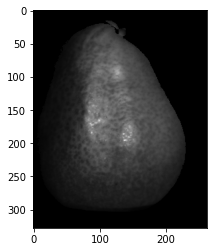

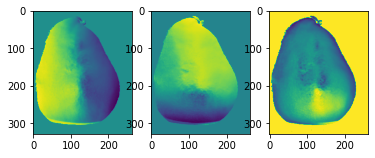

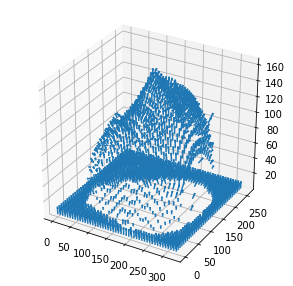

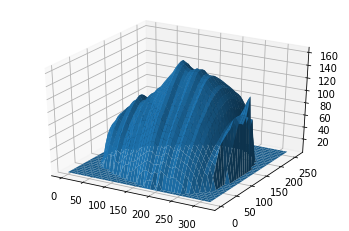

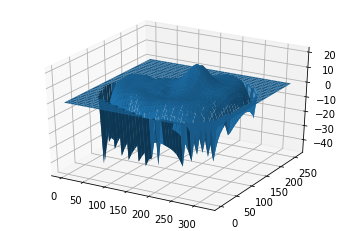

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pickle_in = open("specular_pear.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# lights = np.vstack((data["l1"], data["l2"], data["l4"]))
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
for i in range(1,5):
  images.append((np.dot(np.array(data["im"+str(i)])[:,:,],[0.299,0.587,0.114])))

images = np.array(images)

mask = np.ones((data["im1"].shape[0],data["im1"].shape[1]))
matrix = np.dot(np.array(data["im4"])[:,:,],[0.299,0.587,0.114])
grey_albedo = normalize2(matrix)

for i in range(len(grey_albedo)):
  for j in range(len(grey_albedo[0])):
    if grey_albedo[i][j] <= 0.05:
      mask[i][j] = 0 



albedo, normals, depth, horn = photometric_stereo(images, lights, mask, 1000)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):
    # Stride in the plot, you may want to adjust it to different images
    stride = 7

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.imshow(albedo, cmap="gray")
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], 7),
                          np.arange(0,np.shape(normals)[1], 7),
                          np.arange(1))
    # print(X)
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=10)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

    H = horn[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

visualize(albedo, normals, depth, horn)

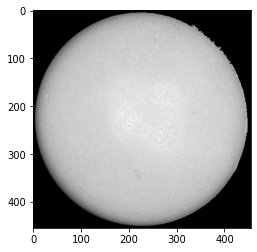

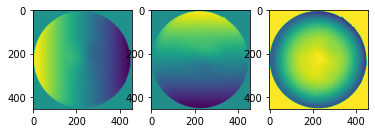

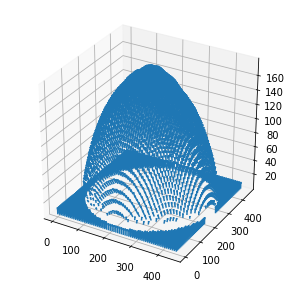

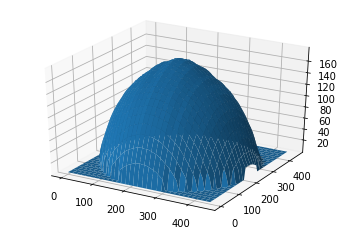

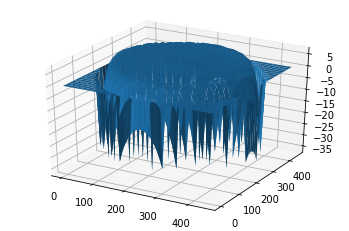

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pickle_in = open("specular_sphere.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# lights = np.vstack((data["l1"], data["l2"], data["l4"]))
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
for i in range(1,5):
  S,G = RGBToSUV(data["im"+str(i)] , np.hstack((data["c"][0][0],data["c"][1][0], data["c"][2][0])))
  images.append(G)

images = np.array(images)

mask = np.ones((data["im1"].shape[0],data["im1"].shape[1]))
grey_albedo = normalize2(G)

for i in range(len(grey_albedo)):
  for j in range(len(grey_albedo[0])):
    if grey_albedo[i][j] <= 0.05:
      mask[i][j] = 0 



albedo, normals, depth, horn = photometric_stereo(images, lights, mask, 1000)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):
    # Stride in the plot, you may want to adjust it to different images
    stride = 7

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.imshow(albedo, cmap="gray")
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], 7),
                          np.arange(0,np.shape(normals)[1], 7),
                          np.arange(1))
    # print(X)
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=10)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

    H = horn[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

visualize(albedo, normals, depth, horn)

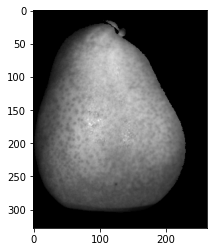

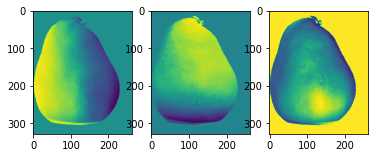

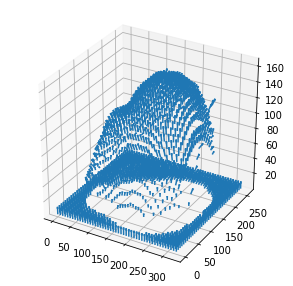

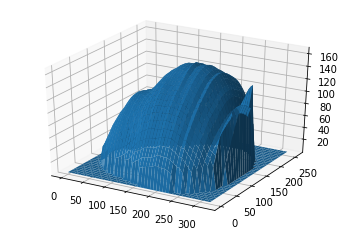

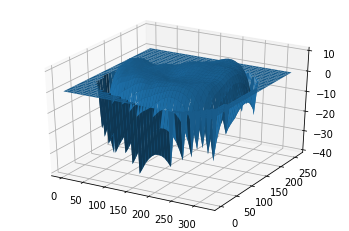

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pickle_in = open("specular_pear.pickle", "rb")
data = pickle.load(pickle_in, encoding="latin1")

# lights = np.vstack((data["l1"], data["l2"], data["l4"]))
lights = np.vstack((data["l1"], data["l2"], data["l3"], data["l4"]))

images = []
for i in range(1,5):
  S,G = RGBToSUV(data["im"+str(i)] , np.hstack((data["c"][0][0],data["c"][1][0], data["c"][2][0])))
  images.append(G)

images = np.array(images)

mask = np.ones((data["im1"].shape[0],data["im1"].shape[1]))
grey_albedo = normalize2(G)

for i in range(len(grey_albedo)):
  for j in range(len(grey_albedo[0])):
    if grey_albedo[i][j] <= 0.05:
      mask[i][j] = 0 



albedo, normals, depth, horn = photometric_stereo(images, lights, mask, 1000)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout. You are also free to change the function
# however you wish; just make sure you get all of the required outputs.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):
    # Stride in the plot, you may want to adjust it to different images
    stride = 7

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.imshow(albedo, cmap="gray")
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], 7),
                          np.arange(0,np.shape(normals)[1], 7),
                          np.arange(1))
    # print(X)
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=10)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

    H = horn[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y, H.T)
    plt.show()

visualize(albedo, normals, depth, horn)